In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [4]:
kolaci = pd.read_excel("kolaci.xlsx")
sportasi = pd.read_excel("sportasi_zscore.xlsx")
stanovi = pd.read_excel("stanovi_zagreb.xlsx")
osobe = pd.read_csv("osobe.csv")


In [11]:
def apply_iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Primjena cappinga
    # Sve vrijednosti manje od donje granice postaju donja granica
    # Sve vrijednosti veće od gornje granice postaju gornja granica
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

In [12]:
osobe

,Unnamed: 0,Visina_cm,Tezina_kg,Mjesecni_Prihod_EUR
0,0,250.0,81.8,1703.0
1,1,120.0,79.6,2200.0
2,2,181.5,86.2,15000.0
3,3,190.2,90.4,200.0
4,4,172.7,69.5,2275.0
...,...,...,...,...
195,195,178.9,77.1,2245.0
196,196,166.2,64.5,2365.0
197,197,176.5,85.0,2011.0
198,198,175.6,77.2,2278.0


In [13]:
osobe.describe()

,Unnamed: 0,Visina_cm,Tezina_kg,Mjesecni_Prihod_EUR
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,174.675000,77.725000,2508.045000
std,57.879185,11.403873,7.100752,1029.839697
min,0.000000,120.000000,55.700000,200.000000
25%,49.750000,167.875000,72.750000,2097.750000
50%,99.500000,175.000000,78.000000,2450.500000
75%,149.250000,180.125000,82.450000,2788.250000
max,199.000000,250.000000,99.500000,15000.000000


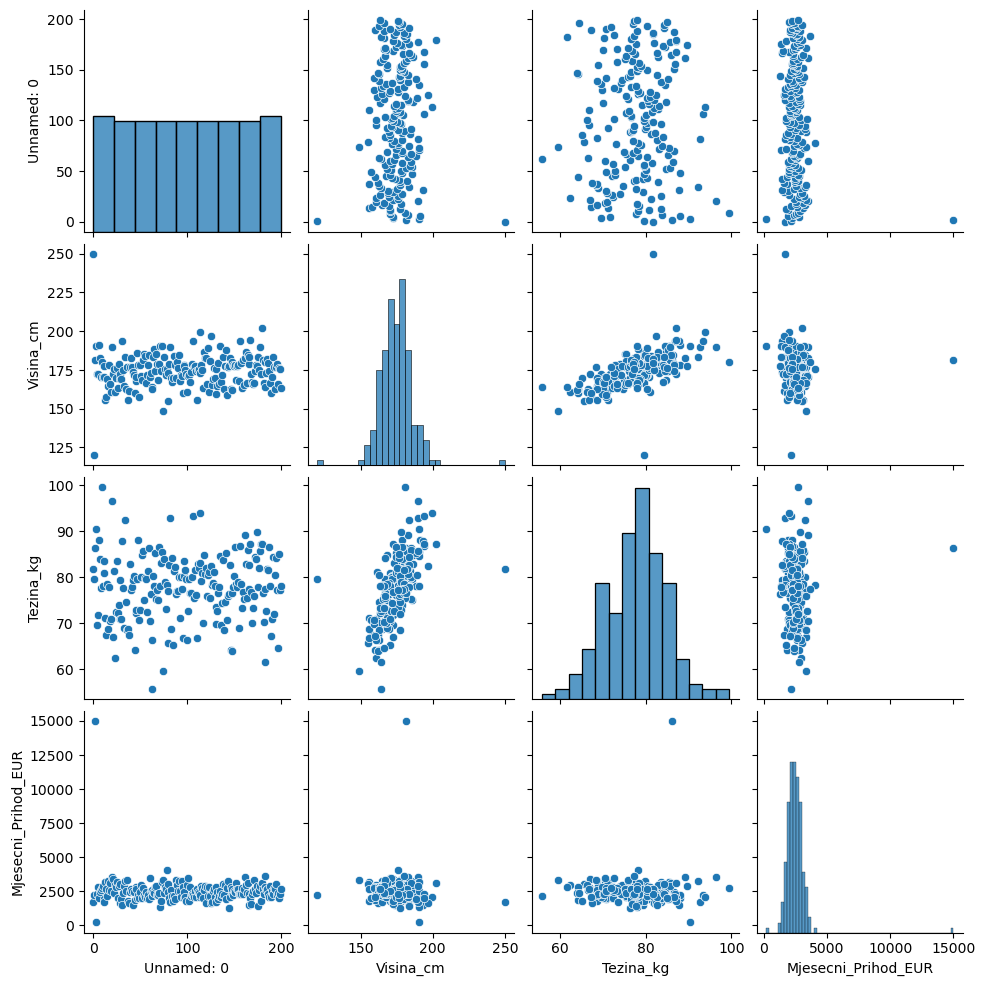

In [14]:
sns.pairplot(osobe)

(array([ 1.,  0.,  8., 68., 99., 21.,  2.,  0.,  0.,  1.]),
 array([120., 133., 146., 159., 172., 185., 198., 211., 224., 237., 250.]),
 <BarContainer object of 10 artists>)

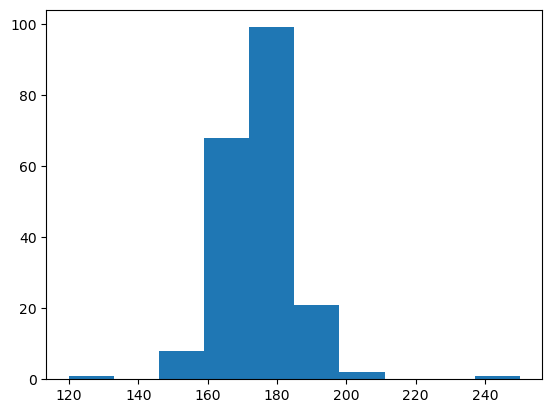

In [15]:
plt.hist(osobe.Visina_cm)

In [16]:
osobe_capped = osobe.copy()

In [17]:
osobe_capped

,Unnamed: 0,Visina_cm,Tezina_kg,Mjesecni_Prihod_EUR
0,0,250.0,81.8,1703.0
1,1,120.0,79.6,2200.0
2,2,181.5,86.2,15000.0
3,3,190.2,90.4,200.0
4,4,172.7,69.5,2275.0
...,...,...,...,...
195,195,178.9,77.1,2245.0
196,196,166.2,64.5,2365.0
197,197,176.5,85.0,2011.0
198,198,175.6,77.2,2278.0


In [18]:
for col in ['Visina_cm', 'Tezina_kg', 'Mjesecni_Prihod_EUR']:
    osobe_capped[col] = apply_iqr_capping(osobe_capped[col])

In [21]:
osobe_capped

,Unnamed: 0,Visina_cm,Tezina_kg,Mjesecni_Prihod_EUR
0,0,198.5,81.8,1703.0
1,1,149.5,79.6,2200.0
2,2,181.5,86.2,3824.0
3,3,190.2,90.4,1062.0
4,4,172.7,69.5,2275.0
...,...,...,...,...
195,195,178.9,77.1,2245.0
196,196,166.2,64.5,2365.0
197,197,176.5,85.0,2011.0
198,198,175.6,77.2,2278.0


In [22]:
osobe_capped.describe()

,Unnamed: 0,Visina_cm,Tezina_kg,Mjesecni_Prihod_EUR
count,200.000000,200.000000,200.000000,200.00000
mean,99.500000,174.544500,77.725000,2455.40000
std,57.879185,9.546252,7.027303,512.81947
min,0.000000,149.500000,58.200000,1062.00000
25%,49.750000,167.875000,72.750000,2097.75000
50%,99.500000,175.000000,78.000000,2450.50000
75%,149.250000,180.125000,82.450000,2788.25000
max,199.000000,198.500000,97.000000,3824.00000


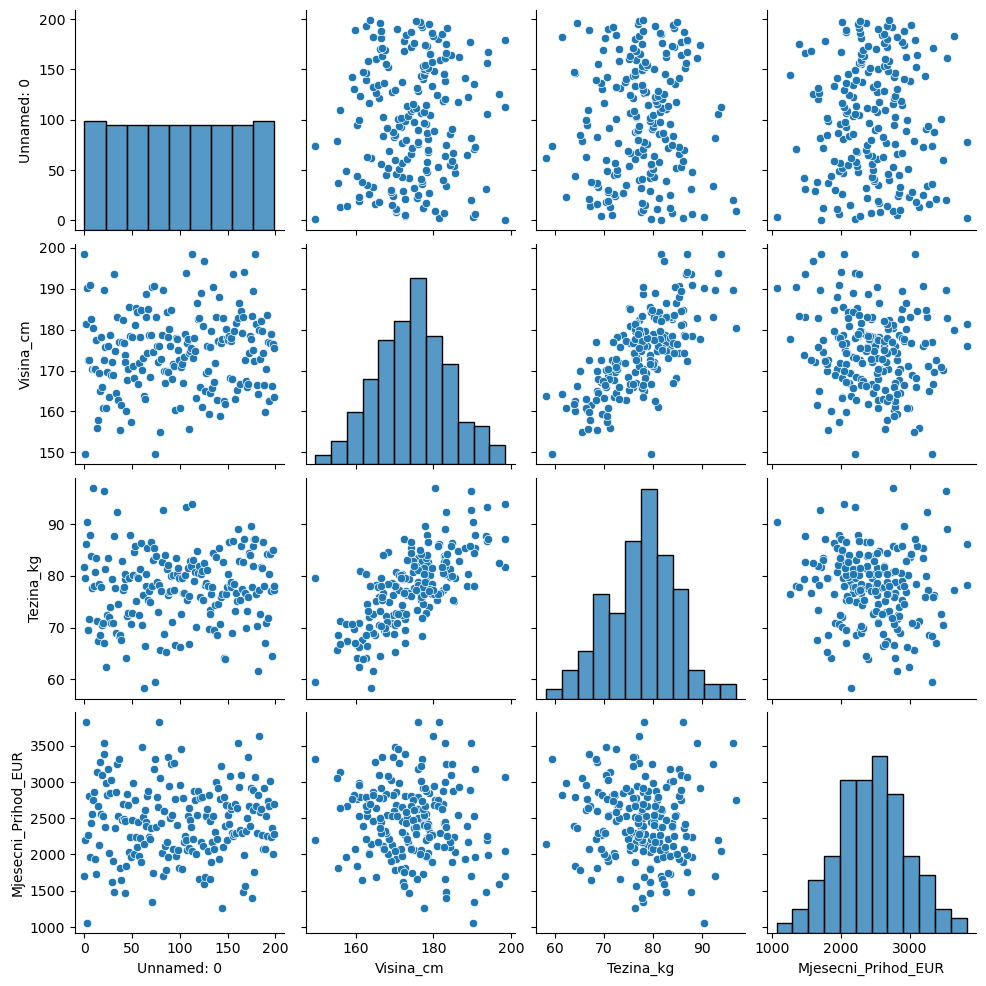

In [23]:
sns.pairplot(osobe_capped)

In [24]:
###### Zadatak 1

In [25]:
kolaci

,tezina
0,62
1,92
2,84
3,98
4,82
...,...
145,104
146,113
147,87
148,89


In [26]:
kolaci.describe()

,tezina
count,150.000000
mean,99.773333
std,11.207707
min,37.000000
25%,93.000000
50%,100.000000
75%,107.000000
max,140.000000


(array([ 1.,  0.,  1.,  0., 17., 45., 59., 25.,  1.,  1.]),
 array([ 37. ,  47.3,  57.6,  67.9,  78.2,  88.5,  98.8, 109.1, 119.4,
        129.7, 140. ]),
 <BarContainer object of 10 artists>)

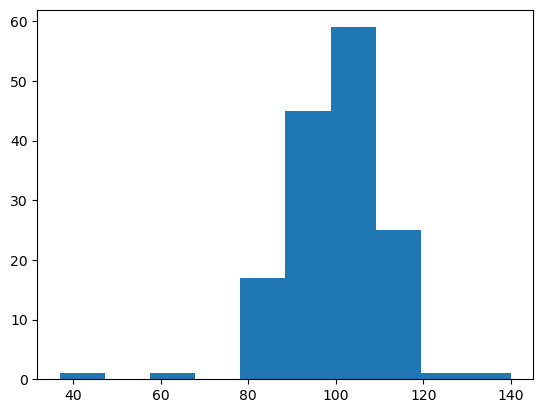

In [27]:
plt.hist(kolaci)

In [28]:
kolaci_copy = kolaci.copy()

In [29]:
for col in ['tezina']:
    kolaci_copy[col] = apply_iqr_capping(kolaci_copy[col])

In [30]:
kolaci_copy

,tezina
0,72
1,92
2,84
3,98
4,82
...,...
145,104
146,113
147,87
148,89


In [31]:
kolaci_copy.describe()

,tezina
count,150.000000
mean,99.993333
std,9.715066
min,72.000000
25%,93.000000
50%,100.000000
75%,107.000000
max,128.000000


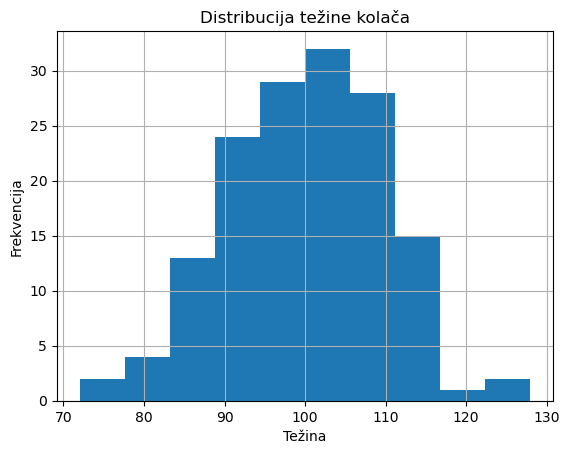

In [35]:
plt.hist(kolaci_copy)
plt.xlabel("Težina")
plt.ylabel("Frekvencija")
plt.title("Distribucija težine kolača")
plt.grid()

In [36]:
#### Zadatak 2

In [37]:
webshop = pd.read_csv("webshop_outliers.csv")
webshop

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
0,0,10,58,1,305.86,7
1,1,5,48,21,92.30,7
2,2,17,70,8,60.46,8
3,3,12,64,13,120000.00,8
4,4,14,78,35,89.36,9
...,...,...,...,...,...,...
295,295,17,69,9,88.01,10
296,296,27,31,28,74.71,7
297,297,14,61,2,568.41,6
298,298,15,78,4,271.02,8


In [38]:
webshop.describe()

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,17.490000,68.610000,24.643333,906.617700,7.896667
std,86.746758,13.380584,115.095589,58.703462,8808.073068,1.510052
min,0.000000,2.000000,-5.000000,1.000000,-10.000000,1.000000
25%,74.750000,11.000000,49.000000,2.000000,83.010000,7.000000
50%,149.500000,15.000000,58.000000,6.000000,147.150000,8.000000
75%,224.250000,19.000000,67.250000,17.000000,248.497500,9.000000
max,299.000000,89.000000,1500.000000,387.000000,120000.000000,10.000000


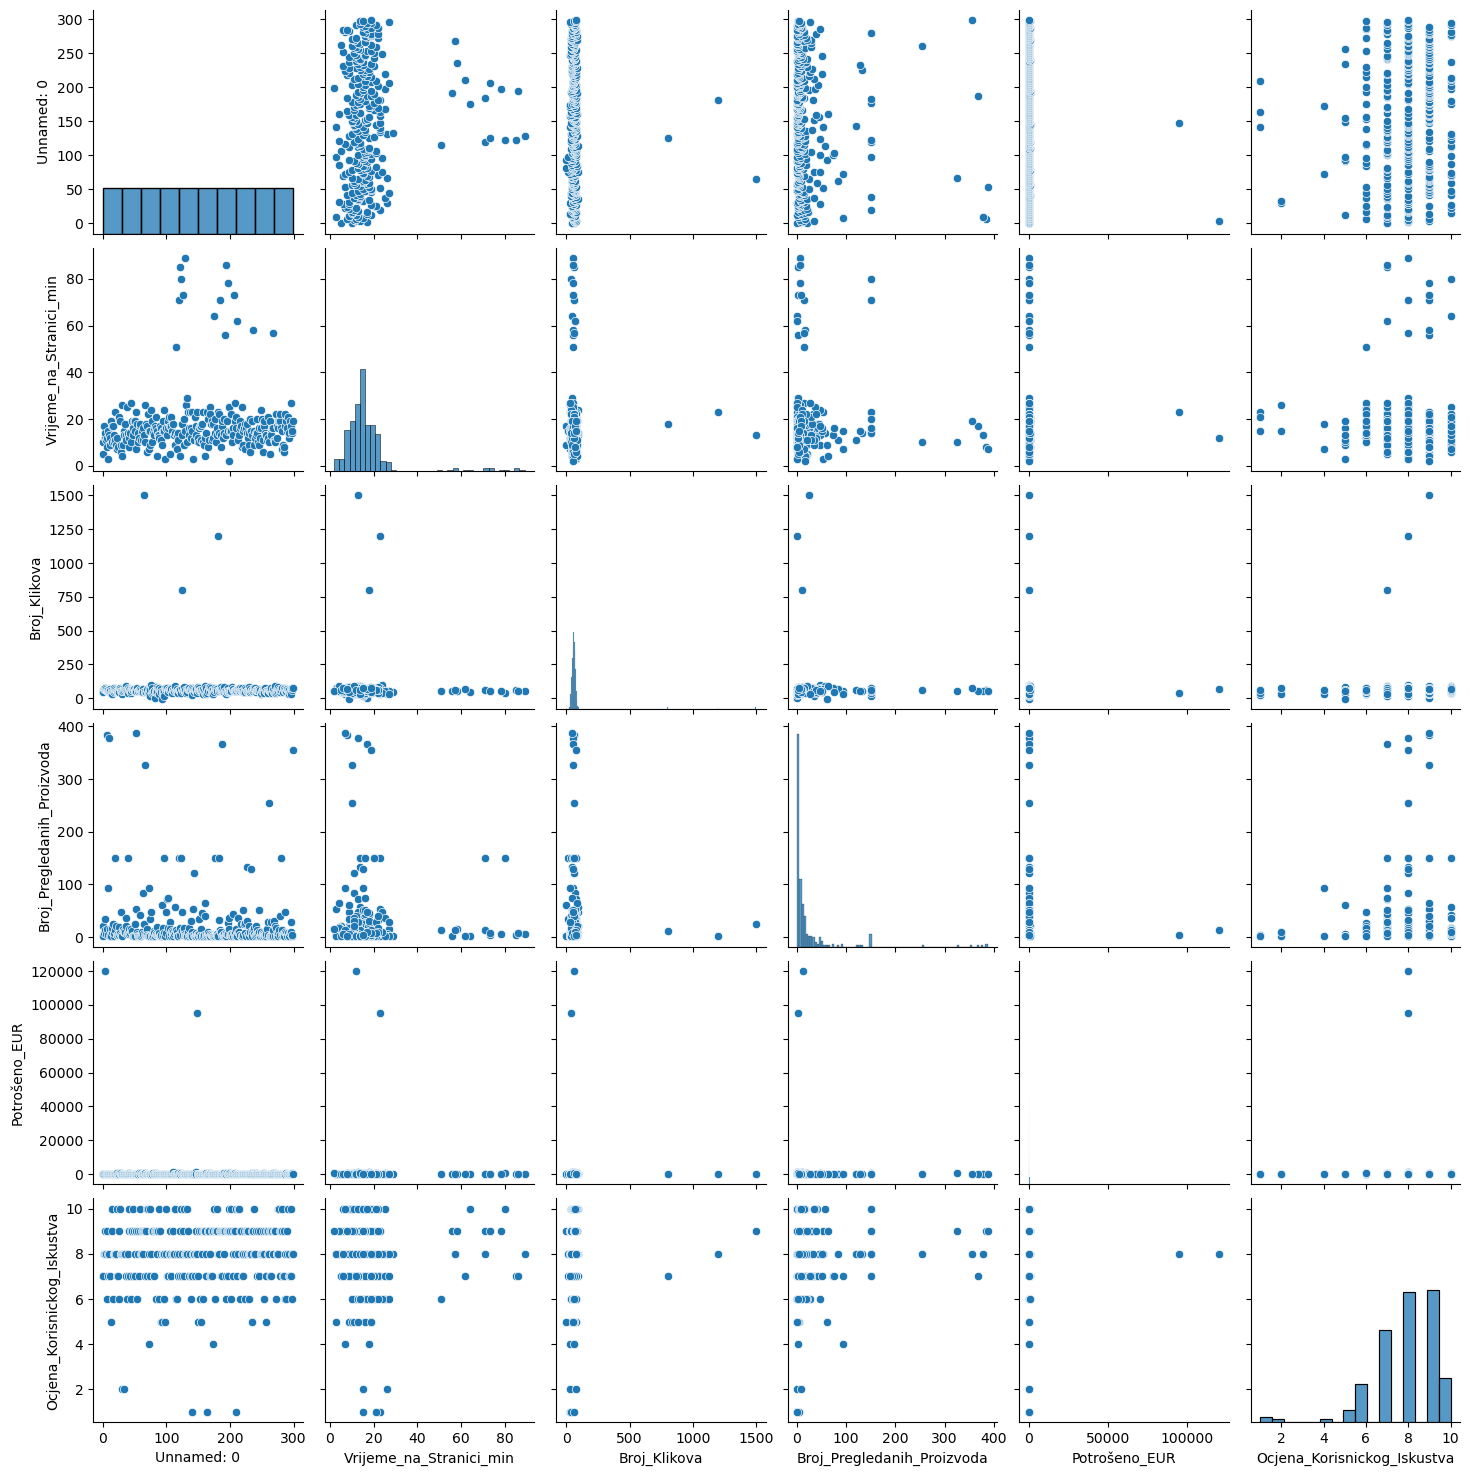

In [39]:
sns.pairplot(webshop)

In [40]:
webshop

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
0,0,10,58,1,305.86,7
1,1,5,48,21,92.30,7
2,2,17,70,8,60.46,8
3,3,12,64,13,120000.00,8
4,4,14,78,35,89.36,9
...,...,...,...,...,...,...
295,295,17,69,9,88.01,10
296,296,27,31,28,74.71,7
297,297,14,61,2,568.41,6
298,298,15,78,4,271.02,8


In [41]:
vrijeme = webshop.sort_values (by = ["Vrijeme_na_Stranici_min"])
vrijeme

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
199,199,2,55,16,503.58,9
9,9,3,62,3,171.97,8
142,142,3,67,53,84.56,8
98,98,3,74,1,392.52,5
86,86,4,49,19,300.50,8
...,...,...,...,...,...,...
197,197,78,52,6,0.01,9
123,123,80,41,150,503.00,10
122,122,85,58,3,124.40,7
194,194,86,54,7,127.60,7


In [42]:
br_klikova = webshop.sort_values (by = ["Broj_Klikova"])
br_klikova

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
93,93,9,-5,61,111.26,5
82,82,17,0,1,30.87,9
97,97,15,14,150,175.00,8
75,75,9,14,35,60.37,7
141,141,15,26,1,253.19,1
...,...,...,...,...,...,...
36,36,13,90,20,49.90,7
76,76,24,94,47,171.40,8
125,125,18,800,11,196.77,7
181,181,23,1200,1,335.84,8


In [43]:
euri = webshop.sort_values (by = ["Potrošeno_EUR"])
euri

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
164,164,23,41,4,-10.00,1
104,104,21,67,2,0.00,8
197,197,78,52,6,0.01,9
50,50,19,53,2,23.36,7
136,136,13,78,18,23.99,7
...,...,...,...,...,...,...
195,195,19,45,6,804.20,9
111,111,18,62,10,999.50,8
146,146,13,49,1,1100.16,8
148,148,23,36,3,95000.00,8


In [47]:
webshop_copy2 = webshop.copy()

In [48]:
for col in ['Broj_Klikova', 'Broj_Pregledanih_Proizvoda', 'Potrošeno_EUR']:
    webshop_copy2[col] = apply_iqr_capping(webshop_copy2[col])

In [49]:
webshop_copy2.describe()

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,17.490000,58.101250,12.270000,184.117692,7.896667
std,86.746758,13.380584,14.004259,13.234144,133.249250,1.510052
min,0.000000,2.000000,21.625000,1.000000,-10.000000,1.000000
25%,74.750000,11.000000,49.000000,2.000000,83.010000,7.000000
50%,149.500000,15.000000,58.000000,6.000000,147.150000,8.000000
75%,224.250000,19.000000,67.250000,17.000000,248.497500,9.000000
max,299.000000,89.000000,94.625000,39.500000,496.728750,10.000000


In [50]:
webshop.describe()

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,17.490000,68.610000,24.643333,906.617700,7.896667
std,86.746758,13.380584,115.095589,58.703462,8808.073068,1.510052
min,0.000000,2.000000,-5.000000,1.000000,-10.000000,1.000000
25%,74.750000,11.000000,49.000000,2.000000,83.010000,7.000000
50%,149.500000,15.000000,58.000000,6.000000,147.150000,8.000000
75%,224.250000,19.000000,67.250000,17.000000,248.497500,9.000000
max,299.000000,89.000000,1500.000000,387.000000,120000.000000,10.000000


In [52]:
webshop_copy2.sort_values (by = ["Broj_Klikova"])


,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
82,82,17,21.625,1.0,30.87,9
93,93,9,21.625,39.5,111.26,5
97,97,15,21.625,39.5,175.00,8
75,75,9,21.625,35.0,60.37,7
141,141,15,26.000,1.0,253.19,1
...,...,...,...,...,...,...
36,36,13,90.000,20.0,49.90,7
76,76,24,94.000,39.5,171.40,8
181,181,23,94.625,1.0,335.84,8
125,125,18,94.625,11.0,196.77,7
